# heart_failure_clinical_study

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 

CREDIT ALL CODE I HAVE LESS THAN 1000 ROWS WHICH IS LIMITATION NEED TO DO A GITHUB PROJECT BOARD??



---

### **1. Load Libraries and confirm directory**

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\lacma\\OneDrive\\Documents\\Visual Studio 2019\\heart_failure_clinical_study\\jupyter_notebooks'

In [4]:
# Data manipulation
#===============================================================================
import pandas as pd
import numpy as np
# Data visualization
#===============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### **2. Load data and analyse basic data information** 

In [8]:
df_raw_data = pd.read_csv('data_set/heart_failure_clinical_records_dataset.csv')
df_raw_data.head(10) #Display first 10 lines of data 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [9]:
#Create a summary of information of the raw data in preparation of data cleaning
#====================================================================================
print(f'The shape of the data frame is{df_raw_data.shape}')
print(f'The data types within the data frame are{df_raw_data.dtypes}')
print(f'The data that is duplicated are {df_raw_data.duplicated().sum()}')
print(f'The data that contain missing values are {df_raw_data.isnull().sum()}')

The shape of the data frame is(299, 13)
The data types within the data frame areage                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object
The data that is duplicated are 0
The data that contain missing values are age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEA

##### Summary of Data Information

- Data shape is medium size  
- Continuous data types are floats or integres and discrete data types like 'DEATH_EVENT' are already encoded to 1 and 0. where 1 is death and 0 is survived. 
- There are no duplicate values  
- There are no missing values in the raw data frame
- Remove time column from data frame as the source does not correctly identify what the column is for 
-Standardise decimal figures to values that make sense. .i.e. column age does not need a decimal point and can be converted to an integer 
-Edit the headers of the columns to remain consistent with cap sensitivity. 

### **3. Clean and preprocess data**

In [11]:
# Remove unecessary column 'time'
#===============================================================================
df_clean = df_raw_data.drop('time', axis = 1) #drop time and rename data frame 
# Standardise all float columns to be rounded to two decimal places 
#=================================================================================
float_cols = df_clean.select_dtypes(include=['float']).columns 
df_clean[float_cols] = df_clean[float_cols].round(2)#round to 2dp
# Convert age column to integers  
#=======================================================================================================
df_clean['age']= df_clean["age"].astype(int)
# Rename column titles to be more consistent 
#=======================================================================================================
df_clean.rename(columns={"DEATH_EVENT": "death_event"}, inplace=True)
df_clean.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,death_event
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,1


### **4. Exploritory Analysis**

### 4a. Initial visualisation

In [12]:
df_clean.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,death_event
age,1.000000,0.087574,-0.081406,-0.101454,0.060195,0.093170,-0.052475,0.159237,-0.045912,0.065546,0.018926,0.253581
anaemia,0.087574,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081406,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101454,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060195,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093170,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052475,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159237,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045912,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065546,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


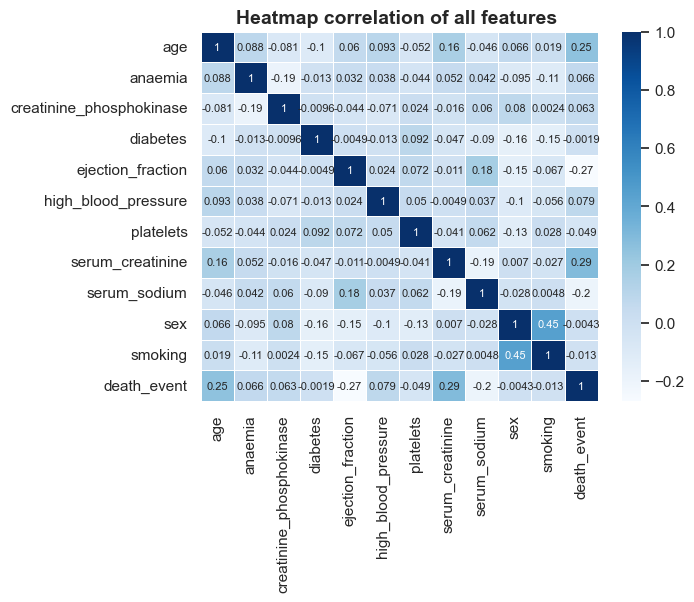

In [19]:
heatmap_figure=sns.set_theme(style="whitegrid") #format the grid colour settings 
sns.heatmap(data=df_clean.corr(), annot=True, linewidths=0.5,annot_kws={"size": 8},cmap='Blues')# set up the heatmap 
plt.title("Heatmap correlation of all features ", fontsize=14, fontweight='bold')
plt.show()#show the heatmap figure

In [36]:
df_clean.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,death_event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


---

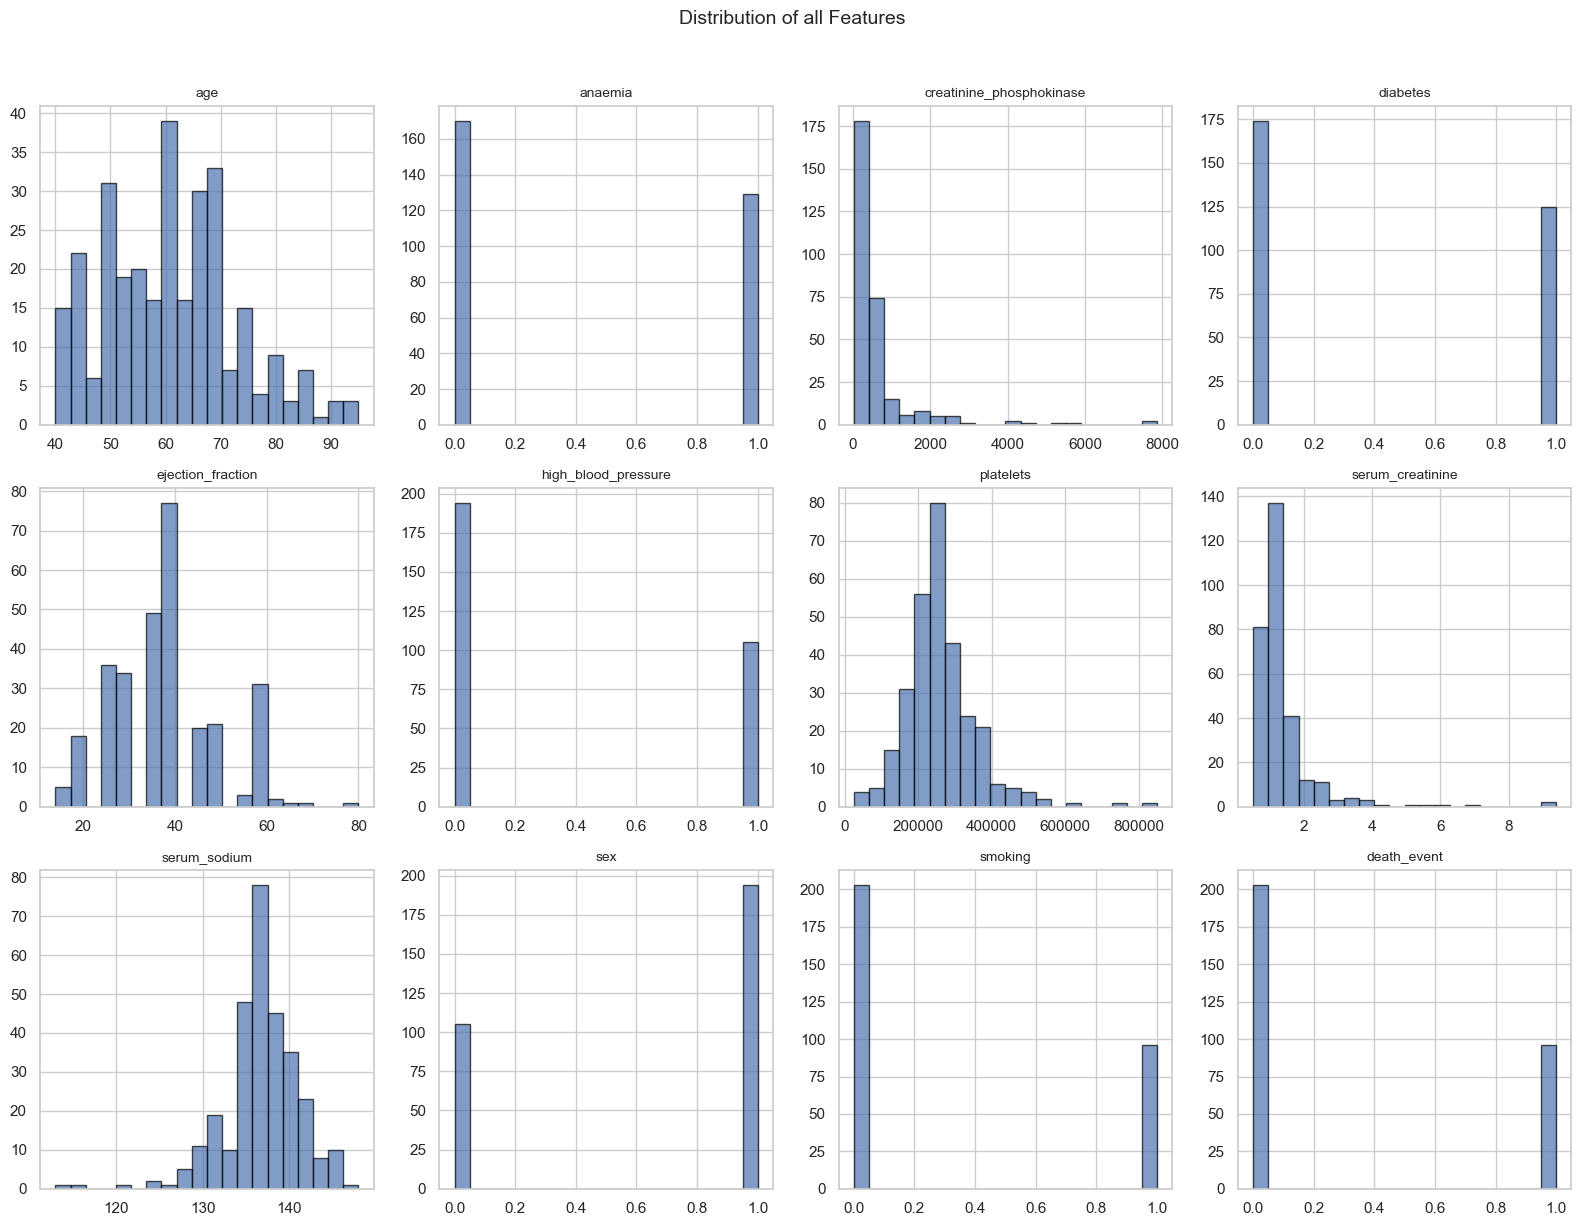

In [32]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(df_clean.columns[:12]):
    axes[idx].hist(df_clean[col], bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')

plt.suptitle('Distribution of all Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

The data for the death event is fairly imbalanced. Therefore prediction from the model is not always the best.

### 4b. Hypothesis testing 

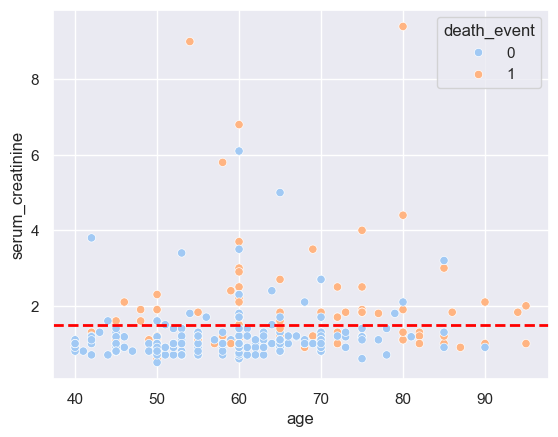

In [44]:
sns.set_theme(palette="pastel")

sns.scatterplot(data=df_clean, y='serum_creatinine', x='age', hue='death_event')

plt.axhline(1.5, linestyle='--', linewidth=2, color='red')
plt.show()

### 4c. Feature Engineering

In [49]:
df_clean['comorbidity_burden'] = (df_clean['anaemia'] + df_clean['diabetes'] + df_clean['high_blood_pressure'] +
df_clean['smoking'])
df_clean['dm_htn_interaction'] = (df_clean['diabetes'] * df_clean['high_blood_pressure'])
df_clean


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,death_event,comorbidity_burden,anaemia_low_ef,dm_htn_interaction
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,1,1,0,0
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,1,0,0,0
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,1,1,0,0
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,1,1,1,0
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,0,61,1,38,1,155000.00,1.1,143,1,1,0,3,0,1
295,55,0,1820,0,38,0,270000.00,1.2,139,0,0,0,0,0,0
296,45,0,2060,1,60,0,742000.00,0.8,138,0,0,0,1,0,0
297,45,0,2413,0,38,0,140000.00,1.4,140,1,1,0,1,0,0


NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---